### nan 미포함 2

XGBoost Model R²: 0.875
Mean Squared Error (MSE): 0.080


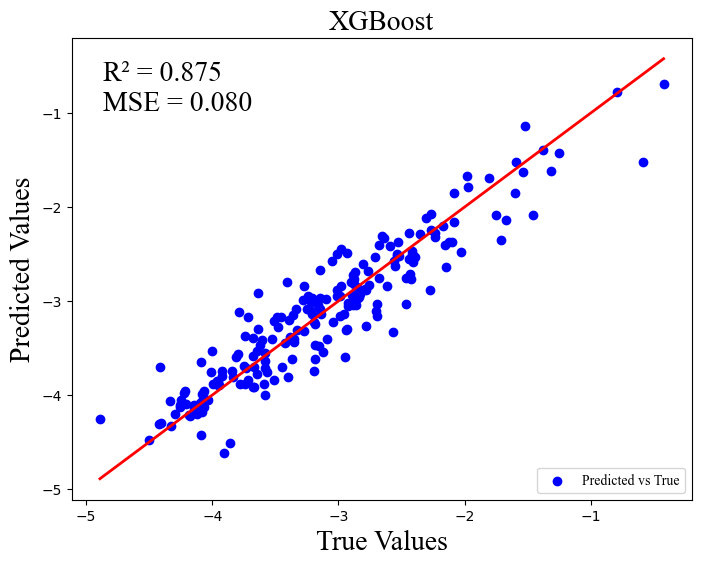

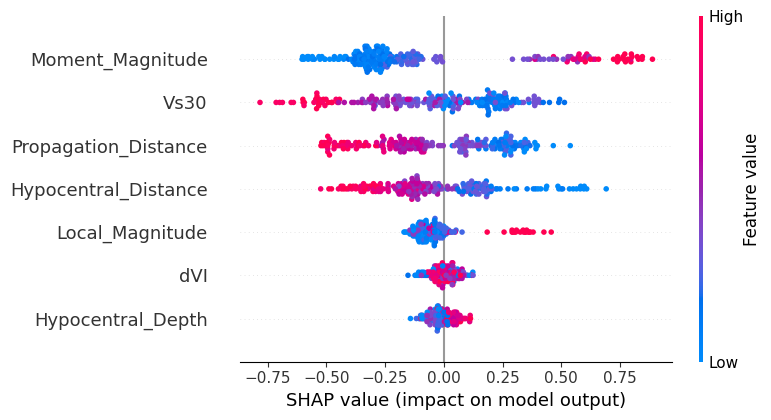

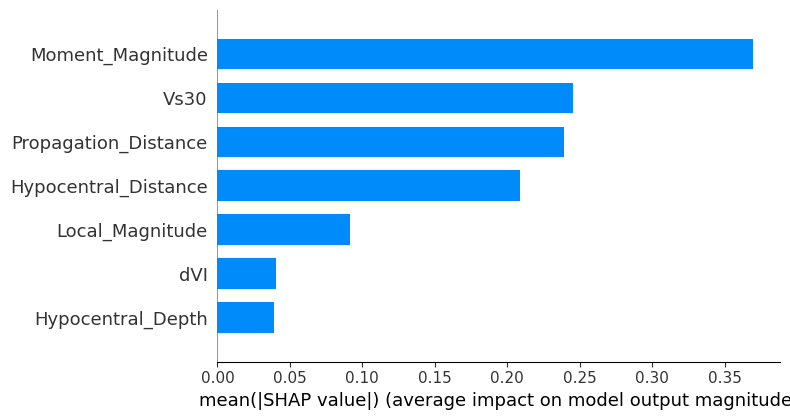

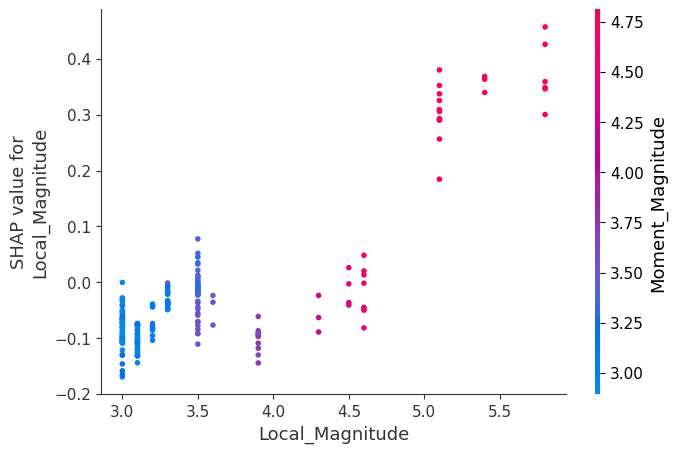

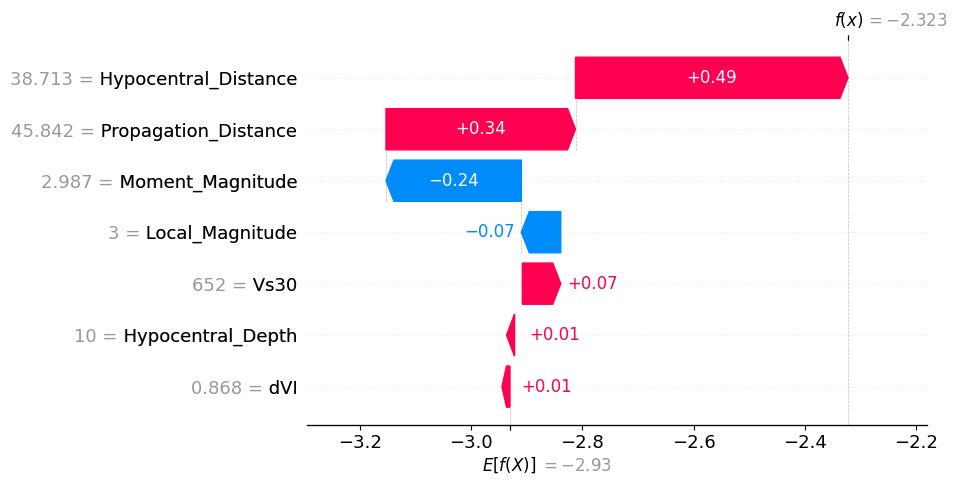

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import shap  # SHAP 라이브러리
from matplotlib import font_manager

# 데이터 로드
file_path = '../earthquake_data/x_nan_2.xlsx'  # 데이터 파일 경로
data = pd.read_excel(file_path, sheet_name=None)

# 'i2' 시트에서 입력 변수 선택  
i2_data = data['i2']
X_i2 = i2_data[['Local_Magnitude', 'Moment_Magnitude', 'Hypocentral_Depth', 'Hypocentral_Distance', 'Propagation_Distance', 'dVI', 'Vs30']]

# 'o2' 시트에서 정답값 (1열) 선택
o2_data = data['o2']
y_o2 = o2_data['1c']

# 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X_i2, y_o2, test_size=0.2, random_state=42)

# 그라디언트 부스팅 모델 학습
gb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
gb_model.fit(X_train, y_train)

# 예측 수행
y_pred = gb_model.predict(X_test)

# R² 점수 계산
r2 = r2_score(y_test, y_pred)

# MSE 계산
mse = mean_squared_error(y_test, y_pred)

# 결과 출력
print(f'XGBoost Model R²: {r2:.3f}')
print(f'Mean Squared Error (MSE): {mse:.3f}')

# 글꼴 설정
font = font_manager.FontProperties(fname='C:/Windows/Fonts/times.ttf')

# 1대1 플롯 그리기
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs True')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title(f'XGBoost', fontproperties=font, fontsize=20)
plt.xlabel('True Values', fontproperties=font, fontsize=20)
plt.ylabel('Predicted Values', fontproperties=font, fontsize=20)
plt.text(0.05, 0.95, f'R² = {r2:.3f}\nMSE = {mse:.3f}', transform=plt.gca().transAxes, fontsize=20, verticalalignment='top', fontproperties=font)
plt.legend(fontsize=20, prop=font)
plt.show()

# SHAP 값 계산
shap.initjs()  # Jupyter 환경에서 force plot을 렌더링할 수 있게 해줍니다.
explainer = shap.Explainer(gb_model, X_train)
shap_values = explainer(X_test)

# SHAP Summary Plot (전체 특성 중요도)
shap.summary_plot(shap_values, X_test)

# SHAP Summary Plot (평균 SHAP 값)
shap.summary_plot(shap_values, X_test, plot_type='bar')

# SHAP Force Plot (첫 번째 예측에 대한 Force Plot)
shap.force_plot(shap_values[0])

# SHAP Dependence Plot (특정 변수와 예측 간 관계)
shap.dependence_plot('Local_Magnitude', shap_values.values, X_test)

# SHAP Waterfall Plot (첫 번째 샘플에 대한 중요도 변화)
shap.waterfall_plot(shap_values[0])


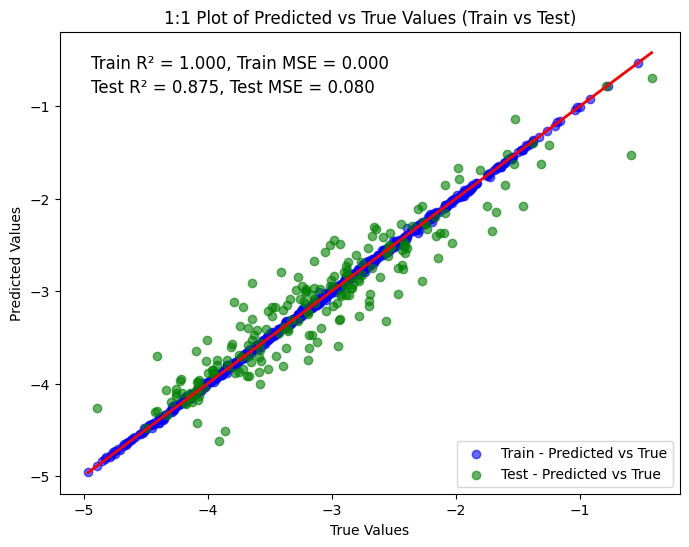

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# 데이터 로드
file_path = '../earthquake_data/x_nan_2.xlsx'  # 데이터 파일 경로
data = pd.read_excel(file_path, sheet_name=None)

# 'i2' 시트에서 입력 변수 선택  
i2_data = data['i2']
X_i2 = i2_data[['Local_Magnitude', 'Moment_Magnitude', 'Hypocentral_Depth', 'Hypocentral_Distance', 'Propagation_Distance', 'dVI', 'Vs30']]

# 'o2' 시트에서 정답값 (1열) 선택
o2_data = data['o2']
y_o2 = o2_data['1c']

# 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X_i2, y_o2, test_size=0.2, random_state=42)

# 그라디언트 부스팅 모델 학습
gb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
gb_model.fit(X_train, y_train)

# 예측 수행
y_pred_train = gb_model.predict(X_train)
y_pred_test = gb_model.predict(X_test)

# R² 점수 계산
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# MSE 계산
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# 1대1 플롯 그리기 (훈련 세트와 테스트 세트)
plt.figure(figsize=(8, 6))

# 훈련 세트
plt.scatter(y_train, y_pred_train, color='blue', label='Train - Predicted vs True', alpha=0.6)

# 테스트 세트
plt.scatter(y_test, y_pred_test, color='green', label='Test - Predicted vs True', alpha=0.6)

# 1대1 직선
plt.plot([y_o2.min(), y_o2.max()], [y_o2.min(), y_o2.max()], color='red', linewidth=2)

# 제목과 레이블
plt.title('1:1 Plot of Predicted vs True Values (Train vs Test)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

# R² 및 MSE를 한 줄로 표시
plt.text(0.05, 0.95, f'Train R² = {r2_train:.3f}, Train MSE = {mse_train:.3f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.90, f'Test R² = {r2_test:.3f}, Test MSE = {mse_test:.3f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# 범례
plt.legend()

# 그래프 출력
plt.show()


Training Models: 100%|██████████| 120/120 [00:16<00:00,  7.24combination/s]
C:\Users\jun_lab\AppData\Local\Temp\ipykernel_14748\2393672273.py:80: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


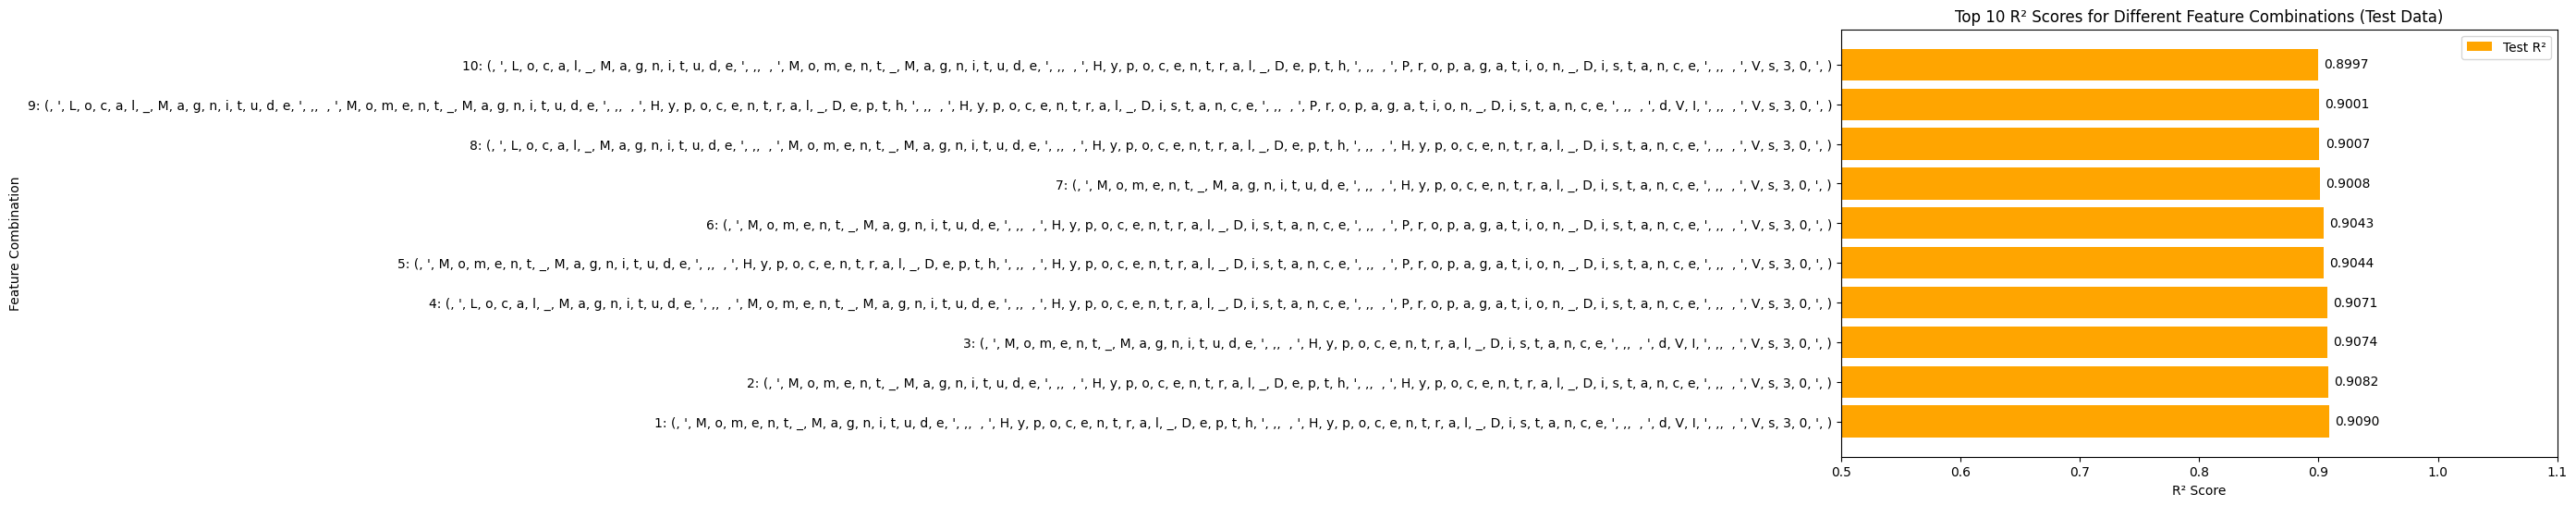

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import itertools
from tqdm import tqdm  # tqdm 임포트

# 데이터 로드
# file_path = '../earthquake_data/x_nan_2.xlsx'  # 데이터 파일 경로
file_path = '../earthquake_data/x_nan_2 - 복사본.xlsx'  # 데이터 파일 경로
data = pd.read_excel(file_path, sheet_name=None)

# 'i2' 시트에서 입력 변수 선택  
i2_data = data['i2']
# X_i2 = i2_data[['Local_Magnitude', 'Moment_Magnitude', 'Hypocentral_Depth', 'Hypocentral_Distance', 'Propagation_Distance', 'dVI', 'Vs30']]
X_i2 = i2_data[['1', '2', '3', '4', '5', '6', '7']]

# 'o2' 시트에서 정답값 (1열) 선택
o2_data = data['o2']
y_o2 = o2_data['1c']

# 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X_i2, y_o2, test_size=0.2, random_state=42)

# 모든 가능한 입력 변수 조합을 생성합니다.
features = X_i2.columns
combinations = []
for r in range(2, len(features) + 1):  # 2개 조합부터 시작해서 전체 조합까지
    combinations.extend(itertools.combinations(features, r))

# 각 조합에 대해 XGBoost 모델 훈련 및 평가
r2_test_scores = {}
for combo in tqdm(combinations, desc="Training Models", unit="combination"):
    # 해당 조합으로 X_train, X_test를 선택합니다.
    X_train_combo = X_train[list(combo)]
    X_test_combo = X_test[list(combo)]
    
    # XGBoost 모델을 초기화하고 훈련시킵니다.
    model = XGBRegressor(n_estimators=100, max_depth=5, random_state=42)
    model.fit(X_train_combo, y_train)
    
    # 예측 수행
    y_pred_test = model.predict(X_test_combo)
    
    # R² 계산
    r2_test = r2_score(y_test, y_pred_test)
    
    # R² 점수를 저장
    r2_test_scores[str(combo)] = r2_test

# R² 값들을 내림차순으로 정렬하여 상위 10개 선택
sorted_r2_test_scores = sorted(r2_test_scores.items(), key=lambda x: x[1], reverse=True)[:10]

# 상위 10개 조합과 R² 값 추출
top_test_combinations = [item[0] for item in sorted_r2_test_scores]
top_test_r2_values = [item[1] for item in sorted_r2_test_scores]

# y축을 각 변수 조합의 인덱스로 표시하기 위해 숫자로 매칭
y_labels = [f'{i+1}: {", ".join(combo)}' for i, combo in enumerate(top_test_combinations)]

# 테스트 세트의 R² 값 비교 그래프 출력
plt.figure(figsize=(10, 6))
bars = plt.barh(y_labels, top_test_r2_values, color='orange', label='Test R²')

# x축 범위 설정
plt.xlim(0.5, 1.1)

# 제목 및 레이블
plt.xlabel('R² Score')
plt.ylabel('Feature Combination')
plt.title('Top 10 R² Scores for Different Feature Combinations (Test Data)')

# R² 값 표시
for bar, r2 in zip(bars, top_test_r2_values):
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2, f'{r2:.4f}', va='center', ha='left', fontsize=10, color='black')

# 범례 추가
plt.legend()

# 그래프 출력
plt.tight_layout()
plt.show()


Training Models: 100%|██████████| 120/120 [00:16<00:00,  7.14combination/s]


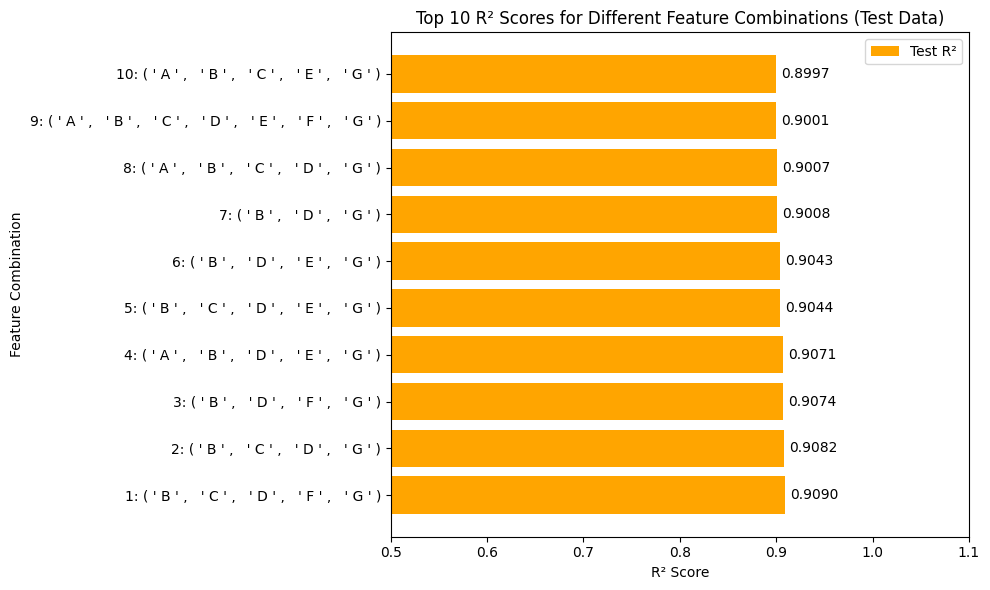

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import itertools
from tqdm import tqdm  # tqdm 임포트

# 데이터 로드
# file_path = '../earthquake_data/x_nan_2.xlsx'  # 데이터 파일 경로
file_path = '../earthquake_data/x_nan_2 - 복사본.xlsx'  # 데이터 파일 경로
data = pd.read_excel(file_path, sheet_name=None)

# 'i2' 시트에서 입력 변수 선택  
i2_data = data['i2']
# X_i2 = i2_data[['Local_Magnitude', 'Moment_Magnitude', 'Hypocentral_Depth', 'Hypocentral_Distance', 'Propagation_Distance', 'dVI', 'Vs30']]
X_i2 = i2_data[['A', 'B', 'C', 'D', 'E', 'F', 'G']]

# 'o2' 시트에서 정답값 (1열) 선택
o2_data = data['o2']
y_o2 = o2_data['1c']

# 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X_i2, y_o2, test_size=0.2, random_state=42)

# 모든 가능한 입력 변수 조합을 생성합니다.
features = X_i2.columns
combinations = []
for r in range(2, len(features) + 1):  # 2개 조합부터 시작해서 전체 조합까지
    combinations.extend(itertools.combinations(features, r))

# 각 조합에 대해 XGBoost 모델 훈련 및 평가
r2_test_scores = {}
for combo in tqdm(combinations, desc="Training Models", unit="combination"):
    # 해당 조합으로 X_train, X_test를 선택합니다.
    X_train_combo = X_train[list(combo)]
    X_test_combo = X_test[list(combo)]
    
    # XGBoost 모델을 초기화하고 훈련시킵니다.
    model = XGBRegressor(n_estimators=100, max_depth=5, random_state=42)
    model.fit(X_train_combo, y_train)
    
    # 예측 수행
    y_pred_test = model.predict(X_test_combo)
    
    # R² 계산
    r2_test = r2_score(y_test, y_pred_test)
    
    # R² 점수를 저장
    r2_test_scores[str(combo)] = r2_test

# R² 값들을 내림차순으로 정렬하여 상위 10개 선택
sorted_r2_test_scores = sorted(r2_test_scores.items(), key=lambda x: x[1], reverse=True)[:10]

# 상위 10개 조합과 R² 값 추출
top_test_combinations = [item[0] for item in sorted_r2_test_scores]
top_test_r2_values = [item[1] for item in sorted_r2_test_scores]

# y축을 각 변수 조합의 인덱스로 표시하기 위해 숫자로 매칭, 쉼표와 공백 제거
y_labels = [f'{i+1}: ' + ' '.join(combo) for i, combo in enumerate(top_test_combinations)]

# 테스트 세트의 R² 값 비교 그래프 출력
plt.figure(figsize=(10, 6))
bars = plt.barh(y_labels, top_test_r2_values, color='orange', label='Test R²')

# x축 범위 설정
plt.xlim(0.5, 1.1)

# 제목 및 레이블
plt.xlabel('R² Score')
plt.ylabel('Feature Combination')
plt.title('Top 10 R² Scores for Different Feature Combinations (Test Data)')

# R² 값 표시
for bar, r2 in zip(bars, top_test_r2_values):
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2, f'{r2:.4f}', va='center', ha='left', fontsize=10, color='black')

# 범례 추가
plt.legend()

# 그래프 출력
plt.tight_layout()
plt.show()


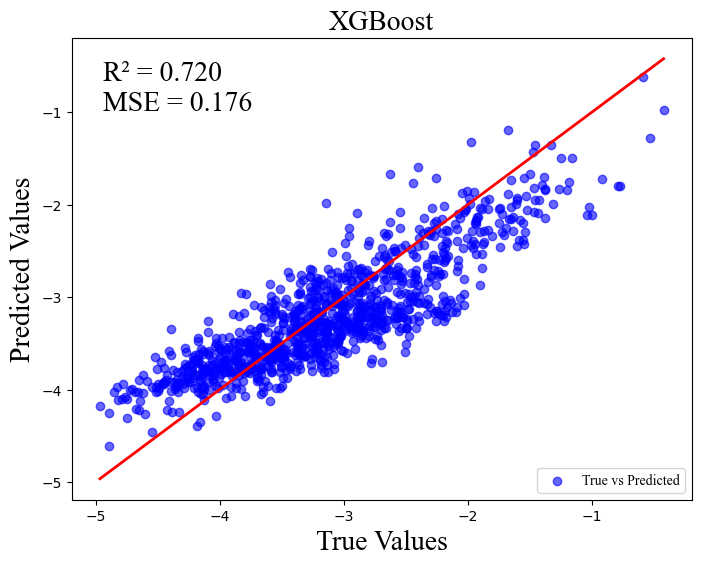

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from matplotlib import font_manager

# 데이터 로드
file_path = '../earthquake_data/x_nan_2.xlsx'  # 데이터 파일 경로
data = pd.read_excel(file_path, sheet_name=None)

# 'i2' 시트에서 입력 변수 선택  
i2_data = data['i2']
X_i2 = i2_data[['Local_Magnitude', 'Moment_Magnitude', 'Hypocentral_Depth', 'Hypocentral_Distance', 'Propagation_Distance', 'dVI', 'Vs30']]

# 'o2' 시트와 'eo2' 시트에서 1열 데이터 선택
o2_data = data['o2']
eo2_data = data['eo2']

# '1C' 열 데이터 추출
y_o2 = o2_data['1c']
y_eo2 = eo2_data['1c']

# R² 점수 계산
r2 = r2_score(y_o2, y_eo2)

# MSE 계산
mse = mean_squared_error(y_o2, y_eo2)

# 글꼴 설정
font = font_manager.FontProperties(fname='C:/Windows/Fonts/times.ttf')

# 1대1 플롯 그리기
plt.figure(figsize=(8, 6))

# 1대1 플롯 (True 값 vs Predicted 값)
plt.scatter(y_o2, y_eo2, color='blue', label='True vs Predicted', alpha=0.6)

# 1대1 직선
plt.plot([y_o2.min(), y_o2.max()], [y_o2.min(), y_o2.max()], color='red', linewidth=2)

# 제목과 레이블
plt.title('XGBoost', fontproperties=font, fontsize=20)
plt.xlabel('True Values', fontproperties=font, fontsize=20)
plt.ylabel('Predicted Values', fontproperties=font, fontsize=20)

# R² 및 MSE 표시
plt.text(0.05, 0.95, f'R² = {r2:.3f}\nMSE = {mse:.3f}', transform=plt.gca().transAxes, fontsize=20, verticalalignment='top', fontproperties=font)

# 범례
plt.legend(fontsize=20, prop=font)

# 그래프 출력
plt.show()


### nan 미포함 4

XGBoost Model R²: 0.994
Mean Squared Error (MSE): 0.004


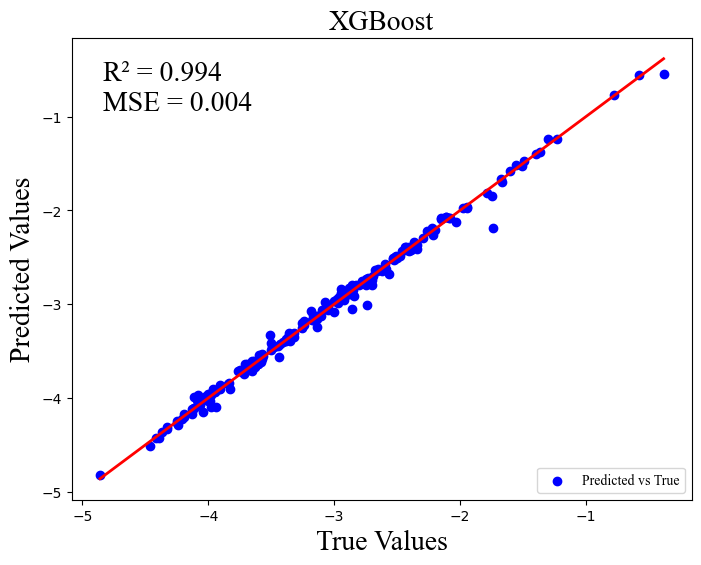

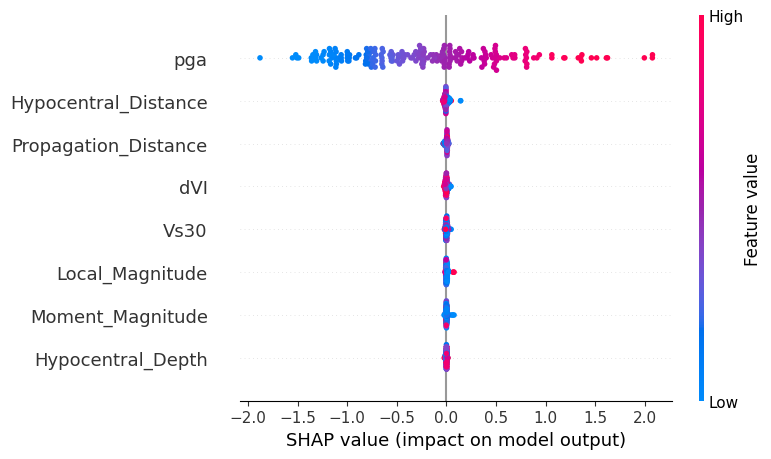

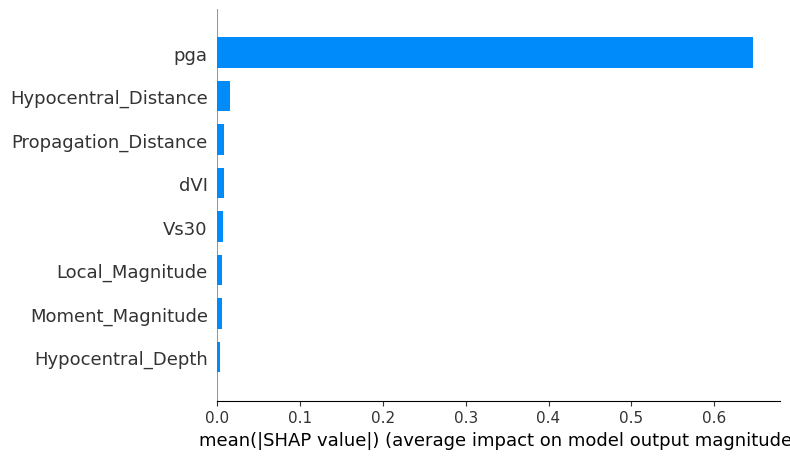

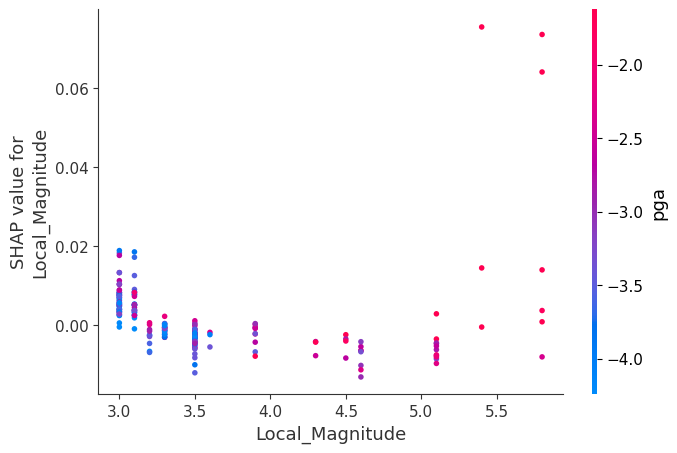

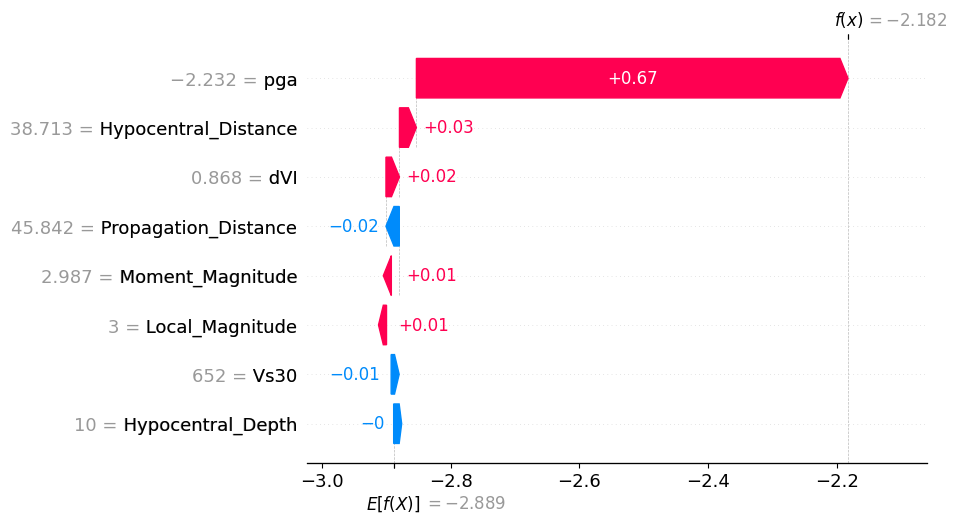

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import shap  # SHAP 라이브러리
from matplotlib import font_manager

# 데이터 로드
file_path = '../earthquake_data/x_nan_4.xlsx'  # 데이터 파일 경로
data = pd.read_excel(file_path, sheet_name=None)

# 'i4' 시트에서 입력 변수 선택  
i4_data = data['i4']
X_i4 = i4_data[['Local_Magnitude', 'Moment_Magnitude', 'Hypocentral_Depth', 'Hypocentral_Distance', 'Propagation_Distance', 'dVI', 'Vs30', 'pga']]

# 'o4' 시트에서 정답값 (1열) 선택
o4_data = data['o4']
y_o4 = o4_data['1c']

# 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X_i4, y_o4, test_size=0.2, random_state=42)

# 그라디언트 부스팅 모델 학습
gb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
gb_model.fit(X_train, y_train)

# 예측 수행
y_pred = gb_model.predict(X_test)

# R² 점수 계산
r2 = r2_score(y_test, y_pred)

# MSE 계산
mse = mean_squared_error(y_test, y_pred)

# 결과 출력
print(f'XGBoost Model R²: {r2:.3f}')
print(f'Mean Squared Error (MSE): {mse:.3f}')

# 글꼴 설정
font = font_manager.FontProperties(fname='C:/Windows/Fonts/times.ttf')

# 1대1 플롯 그리기
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs True')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title(f'XGBoost', fontproperties=font, fontsize=20)
plt.xlabel('True Values', fontproperties=font, fontsize=20)
plt.ylabel('Predicted Values', fontproperties=font, fontsize=20)
plt.text(0.05, 0.95, f'R² = {r2:.3f}\nMSE = {mse:.3f}', transform=plt.gca().transAxes, fontsize=20, verticalalignment='top', fontproperties=font)
plt.legend(fontsize=20, prop=font)
plt.show()

# SHAP 값 계산
shap.initjs()  # Jupyter 환경에서 force plot을 렌더링할 수 있게 해줍니다.
explainer = shap.Explainer(gb_model, X_train)
shap_values = explainer(X_test)

# SHAP Summary Plot (전체 특성 중요도)
shap.summary_plot(shap_values, X_test)

# SHAP Summary Plot (평균 SHAP 값)
shap.summary_plot(shap_values, X_test, plot_type='bar')

# SHAP Force Plot (첫 번째 예측에 대한 Force Plot)
shap.force_plot(shap_values[0])

# SHAP Dependence Plot (특정 변수와 예측 간 관계)
shap.dependence_plot('Local_Magnitude', shap_values.values, X_test)

# SHAP Waterfall Plot (첫 번째 샘플에 대한 중요도 변화)
shap.waterfall_plot(shap_values[0])


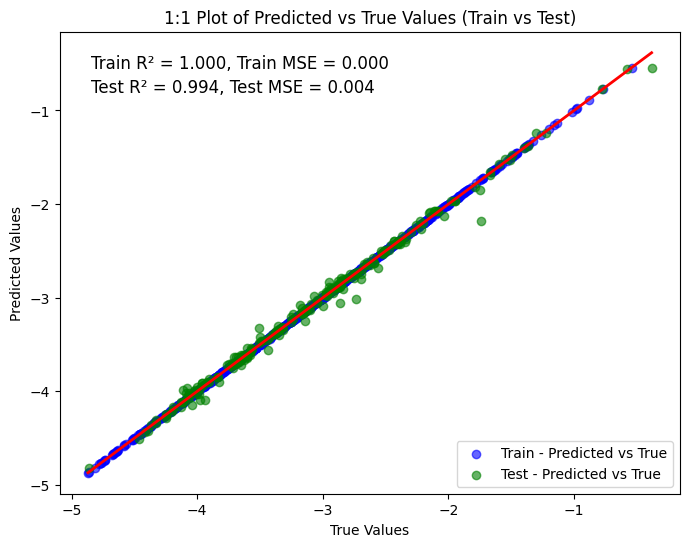

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# 데이터 로드
file_path = '../earthquake_data/x_nan_4.xlsx'  # 데이터 파일 경로
data = pd.read_excel(file_path, sheet_name=None)

# 'i4' 시트에서 입력 변수 선택  
i4_data = data['i4']
X_i4 = i4_data[['Local_Magnitude', 'Moment_Magnitude', 'Hypocentral_Depth', 'Hypocentral_Distance', 'Propagation_Distance', 'dVI', 'Vs30', 'pga']]

# 'o4' 시트에서 정답값 (1열) 선택
o4_data = data['o4']
y_o4 = o4_data['1c']

# 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X_i4, y_o4, test_size=0.2, random_state=42)

# 그라디언트 부스팅 모델 학습
gb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
gb_model.fit(X_train, y_train)

# 예측 수행
y_pred_train = gb_model.predict(X_train)
y_pred_test = gb_model.predict(X_test)

# R² 점수 계산
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# MSE 계산
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# 1대1 플롯 그리기 (훈련 세트와 테스트 세트)
plt.figure(figsize=(8, 6))

# 훈련 세트
plt.scatter(y_train, y_pred_train, color='blue', label='Train - Predicted vs True', alpha=0.6)

# 테스트 세트
plt.scatter(y_test, y_pred_test, color='green', label='Test - Predicted vs True', alpha=0.6)

# 1대1 직선
plt.plot([y_o4.min(), y_o4.max()], [y_o4.min(), y_o4.max()], color='red', linewidth=2)

# 제목과 레이블
plt.title('1:1 Plot of Predicted vs True Values (Train vs Test)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

# R² 및 MSE를 한 줄로 표시
plt.text(0.05, 0.95, f'Train R² = {r2_train:.3f}, Train MSE = {mse_train:.3f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.90, f'Test R² = {r2_test:.3f}, Test MSE = {mse_test:.3f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# 범례
plt.legend()

# 그래프 출력
plt.show()


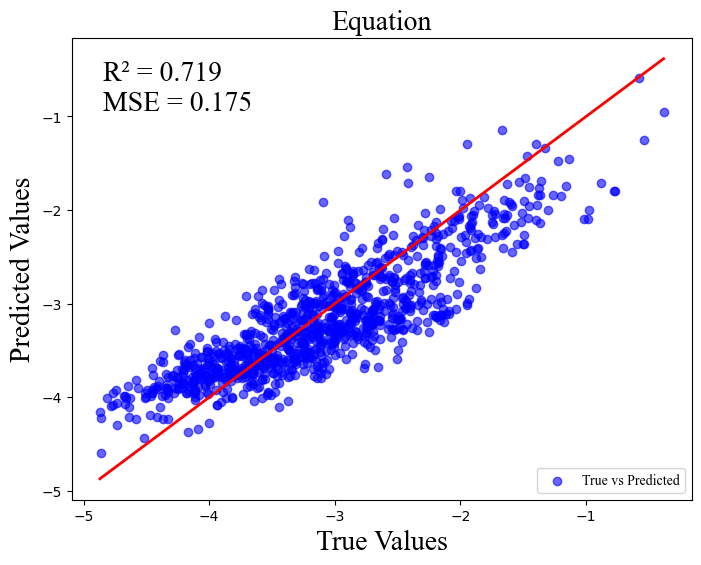

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from matplotlib import font_manager

# 데이터 로드
file_path = '../earthquake_data/x_nan_4.xlsx'  # 데이터 파일 경로
data = pd.read_excel(file_path, sheet_name=None)

# 'i4' 시트에서 입력 변수 선택  
i4_data = data['i4']
X_i4 = i4_data[['Local_Magnitude', 'Moment_Magnitude', 'Hypocentral_Depth', 'Hypocentral_Distance', 'Propagation_Distance', 'dVI', 'Vs30']]

# 'o4' 시트와 'eo4' 시트에서 1열 데이터 선택
o4_data = data['o4']
eo4_data = data['eo4']

# '1C' 열 데이터 추출
y_o4 = o4_data['1c']
y_eo4 = eo4_data['1c']

# R² 점수 계산
r2 = r2_score(y_o4, y_eo4)

# MSE 계산
mse = mean_squared_error(y_o4, y_eo4)

# 글꼴 설정
font = font_manager.FontProperties(fname='C:/Windows/Fonts/times.ttf')

# 1대1 플롯 그리기
plt.figure(figsize=(8, 6))

# 1대1 플롯 (True 값 vs Predicted 값)
plt.scatter(y_o4, y_eo4, color='blue', label='True vs Predicted', alpha=0.6)

# 1대1 직선
plt.plot([y_o4.min(), y_o4.max()], [y_o4.min(), y_o4.max()], color='red', linewidth=2)

# 제목과 레이블
plt.title('Equation', fontproperties=font, fontsize=20)
plt.xlabel('True Values', fontproperties=font, fontsize=20)
plt.ylabel('Predicted Values', fontproperties=font, fontsize=20)

# R² 및 MSE 표시
plt.text(0.05, 0.95, f'R² = {r2:.3f}\nMSE = {mse:.3f}', transform=plt.gca().transAxes, fontsize=20, verticalalignment='top', fontproperties=font)

# 범례
plt.legend(fontsize=20, prop=font)

# 그래프 출력
plt.show()


### 전체 2

XGBoost Model R²: 0.823
Mean Squared Error (MSE): 0.117


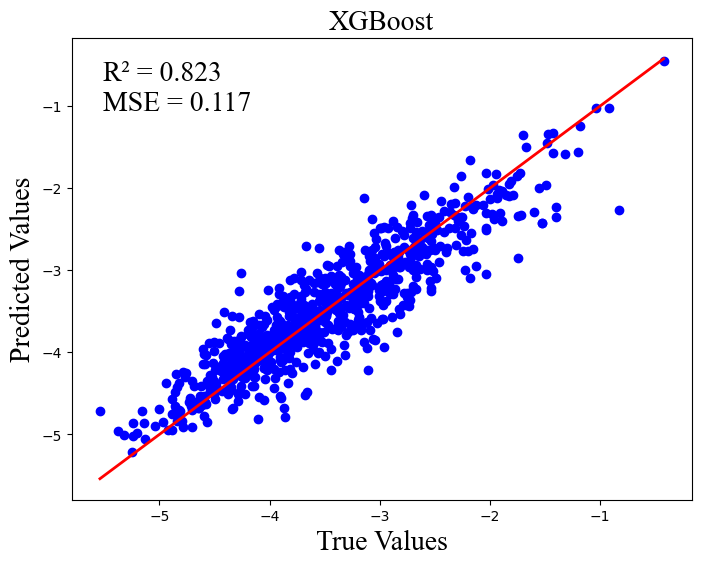

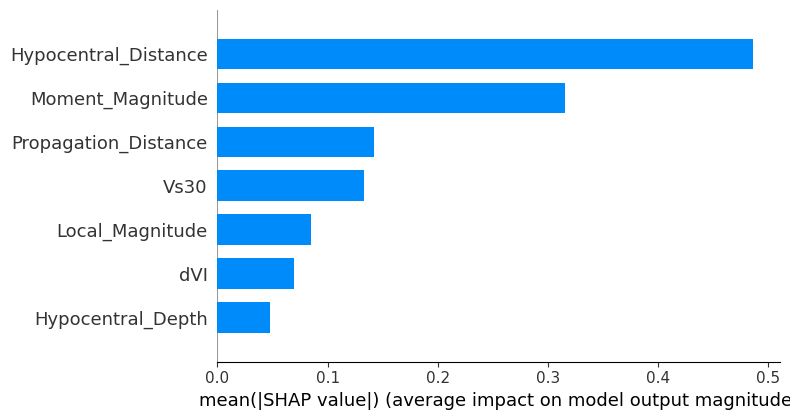

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import shap  # SHAP 라이브러리

# 데이터 로드
file_path = '../earthquake_data/2.xlsx'  # 데이터 파일 경로
data = pd.read_excel(file_path, sheet_name=None)

# 'i2' 시트에서 입력 변수 선택  
i2_data = data['i2']
X_i2 = i2_data[['Local_Magnitude', 'Moment_Magnitude', 'Hypocentral_Depth', 'Hypocentral_Distance', 'Propagation_Distance', 'dVI', 'Vs30']]

# 'o2' 시트에서 정답값 (1열) 선택
o2_data = data['o2']
y_o2 = o2_data['1c']

# 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X_i2, y_o2, test_size=0.2, random_state=42)

# 그라디언트 부스팅 모델 학습
gb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
gb_model.fit(X_train, y_train)

# 예측 수행
y_pred = gb_model.predict(X_test)

# R² 점수 계산
r2 = r2_score(y_test, y_pred)

# MSE 계산
mse = mean_squared_error(y_test, y_pred)

# 결과 출력
print(f'XGBoost Model R²: {r2:.3f}')
print(f'Mean Squared Error (MSE): {mse:.3f}')

# 1대1 플롯 그리기
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs True')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title(f'XGBoost', fontname='Times New Roman', fontsize=20)
plt.xlabel('True Values', fontname='Times New Roman', fontsize=20)
plt.ylabel('Predicted Values', fontname='Times New Roman', fontsize=20)
plt.text(0.05, 0.95, f'R² = {r2:.3f}\nMSE = {mse:.3f}', transform=plt.gca().transAxes, fontsize=20, verticalalignment='top', fontname='Times New Roman')
plt.show()

# SHAP 값 계산
shap.initjs()  # Jupyter 환경에서 force plot을 렌더링할 수 있게 해줍니다.
explainer = shap.Explainer(gb_model, X_train)
shap_values = explainer(X_test)

# SHAP Summary Plot (전체 특성 중요도)
# shap.summary_plot(shap_values, X_test)

# SHAP Summary Plot (평균 SHAP 값)
shap.summary_plot(shap_values, X_test, plot_type='bar')

# SHAP Force Plot (첫 번째 예측에 대한 Force Plot)
# shap.force_plot(shap_values[0])

# SHAP Dependence Plot (특정 변수와 예측 간 관계)
# 'shap_values.values' 또는 'shap_values.data' 사용하여 오류 해결
# shap.dependence_plot('Local_Magnitude', shap_values.values, X_test)

# SHAP Waterfall Plot (첫 번째 샘플에 대한 중요도 변화)
# shap.waterfall_plot(shap_values[0])


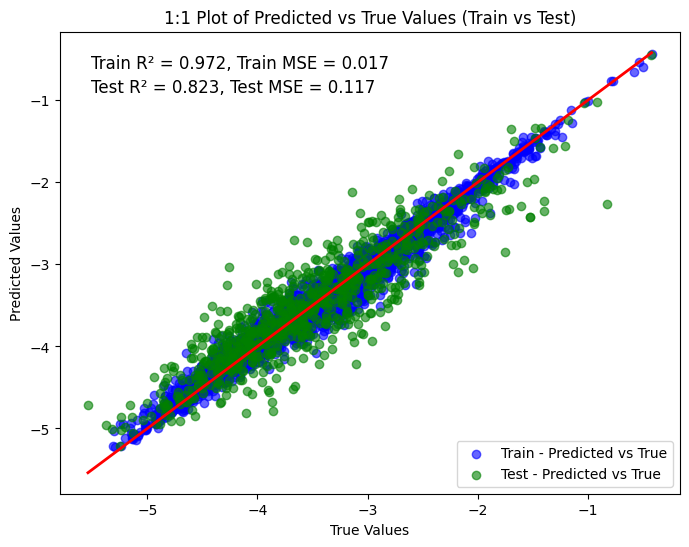

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# 데이터 로드
file_path = '../earthquake_data/2.xlsx'  # 데이터 파일 경로
data = pd.read_excel(file_path, sheet_name=None)

# 'i2' 시트에서 입력 변수 선택  
i2_data = data['i2']
X_i2 = i2_data[['Local_Magnitude', 'Moment_Magnitude', 'Hypocentral_Depth', 'Hypocentral_Distance', 'Propagation_Distance', 'dVI', 'Vs30']]

# 'o2' 시트에서 정답값 (1열) 선택
o2_data = data['o2']
y_o2 = o2_data['1c']

# 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X_i2, y_o2, test_size=0.2, random_state=42)

# 그라디언트 부스팅 모델 학습
gb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
gb_model.fit(X_train, y_train)

# 예측 수행
y_pred_train = gb_model.predict(X_train)
y_pred_test = gb_model.predict(X_test)

# R² 점수 계산
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# MSE 계산
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# 1대1 플롯 그리기 (훈련 세트와 테스트 세트)
plt.figure(figsize=(8, 6))

# 훈련 세트
plt.scatter(y_train, y_pred_train, color='blue', label='Train - Predicted vs True', alpha=0.6)

# 테스트 세트
plt.scatter(y_test, y_pred_test, color='green', label='Test - Predicted vs True', alpha=0.6)

# 1대1 직선
plt.plot([y_o2.min(), y_o2.max()], [y_o2.min(), y_o2.max()], color='red', linewidth=2)

# 제목과 레이블
plt.title('1:1 Plot of Predicted vs True Values (Train vs Test)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

# R² 및 MSE를 한 줄로 표시
plt.text(0.05, 0.95, f'Train R² = {r2_train:.3f}, Train MSE = {mse_train:.3f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.90, f'Test R² = {r2_test:.3f}, Test MSE = {mse_test:.3f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# 범례
plt.legend()

# 그래프 출력
plt.show()


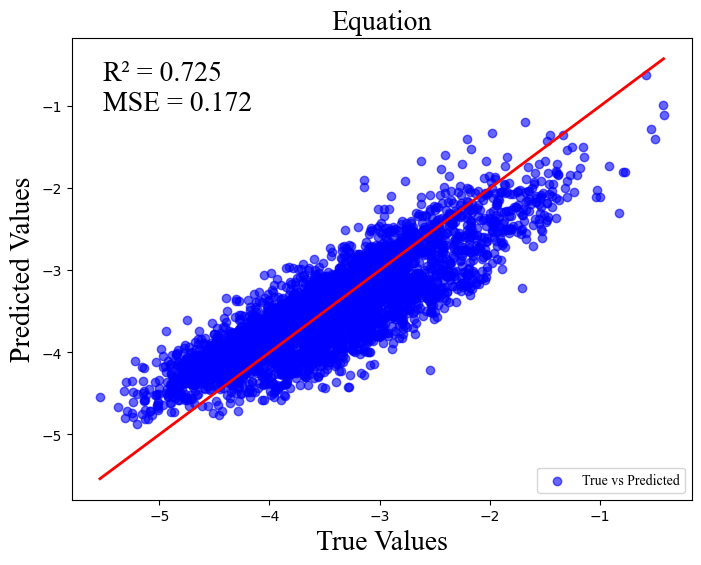

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from matplotlib import font_manager

# 데이터 로드
file_path = '../earthquake_data/2.xlsx'  # 데이터 파일 경로
data = pd.read_excel(file_path, sheet_name=None)

# 'i2' 시트에서 입력 변수 선택  
i2_data = data['i2']
X_i2 = i2_data[['Local_Magnitude', 'Moment_Magnitude', 'Hypocentral_Depth', 'Hypocentral_Distance', 'Propagation_Distance', 'dVI', 'Vs30']]

# 'o2' 시트와 'eo2' 시트에서 1열 데이터 선택
o2_data = data['o2']
eo2_data = data['eo2']

# '1C' 열 데이터 추출
y_o2 = o2_data['1c']
y_eo2 = eo2_data['1c']

# R² 점수 계산
r2 = r2_score(y_o2, y_eo2)

# MSE 계산
mse = mean_squared_error(y_o2, y_eo2)

# 글꼴 설정
font = font_manager.FontProperties(fname='C:/Windows/Fonts/times.ttf')

# 1대1 플롯 그리기
plt.figure(figsize=(8, 6))

# 1대1 플롯 (True 값 vs Predicted 값)
plt.scatter(y_o2, y_eo2, color='blue', label='True vs Predicted', alpha=0.6)

# 1대1 직선
plt.plot([y_o2.min(), y_o2.max()], [y_o2.min(), y_o2.max()], color='red', linewidth=2)

# 제목과 레이블
plt.title('Equation', fontproperties=font, fontsize=20)
plt.xlabel('True Values', fontproperties=font, fontsize=20)
plt.ylabel('Predicted Values', fontproperties=font, fontsize=20)

# R² 및 MSE 표시
plt.text(0.05, 0.95, f'R² = {r2:.3f}\nMSE = {mse:.3f}', transform=plt.gca().transAxes, fontsize=20, verticalalignment='top', fontproperties=font)

# 범례
plt.legend(fontsize=20, prop=font)

# 그래프 출력
plt.show()


### 전체 4

XGBoost Model R²: 0.995
Mean Squared Error (MSE): 0.003


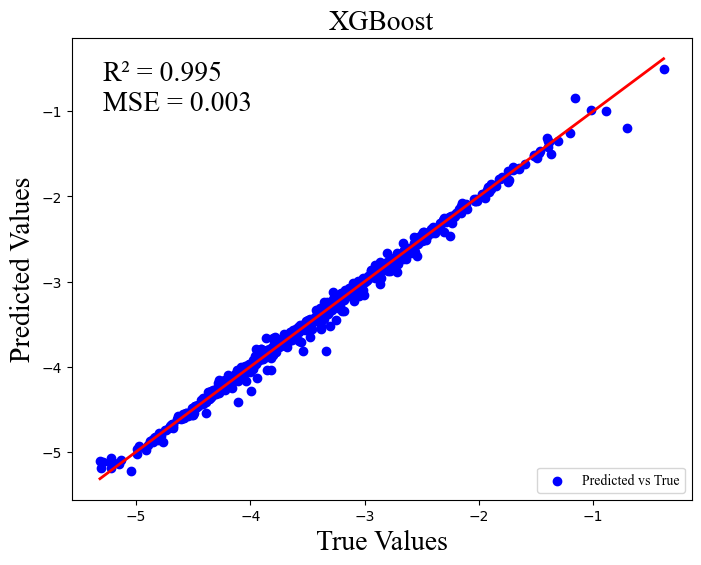

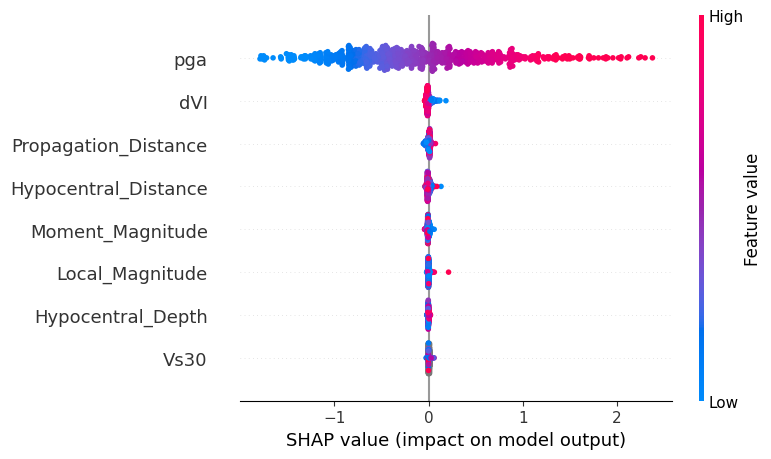

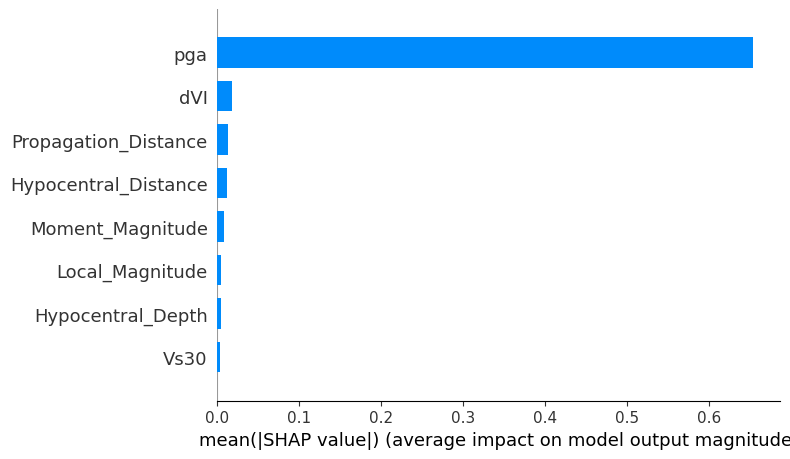

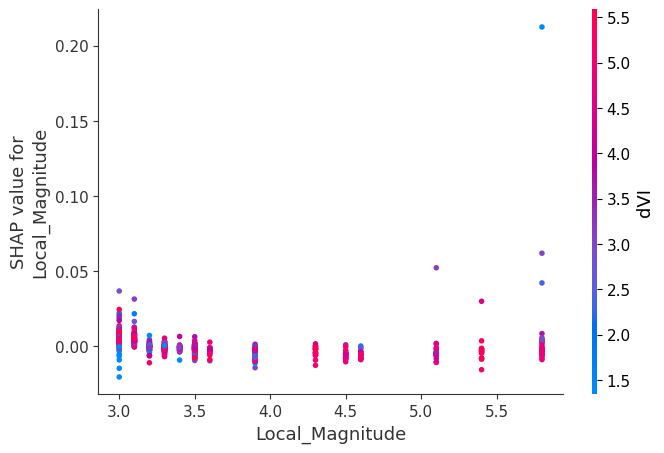

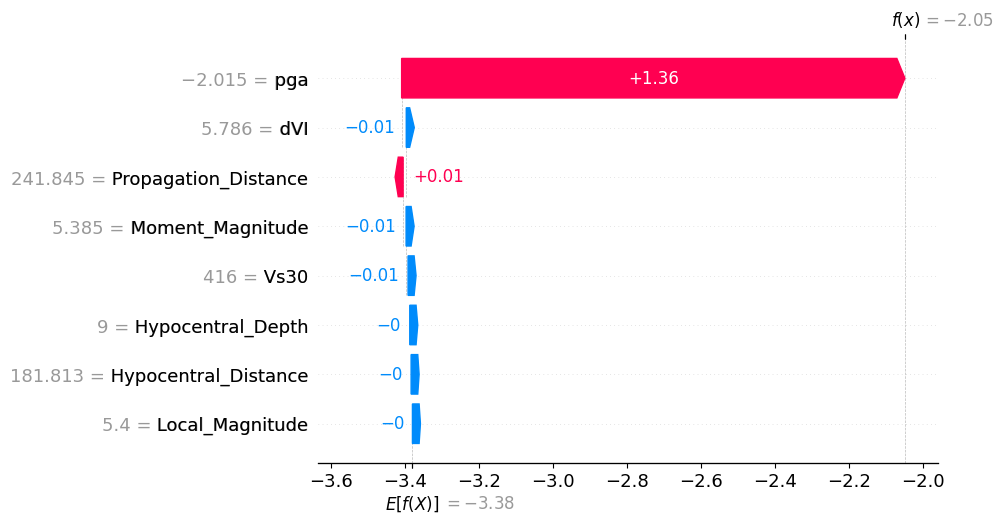

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import shap  # SHAP 라이브러리
from matplotlib import font_manager

# 데이터 로드
file_path = '../earthquake_data/4.xlsx'  # 데이터 파일 경로
data = pd.read_excel(file_path, sheet_name=None)

# 'i4' 시트에서 입력 변수 선택  
i4_data = data['i4']
X_i4 = i4_data[['Local_Magnitude', 'Moment_Magnitude', 'Hypocentral_Depth', 'Hypocentral_Distance', 'Propagation_Distance', 'dVI', 'Vs30', 'pga']]

# 'o4' 시트에서 정답값 (1열) 선택
o4_data = data['o4']
y_o4 = o4_data['1c']

# 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X_i4, y_o4, test_size=0.2, random_state=42)

# 그라디언트 부스팅 모델 학습
gb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
gb_model.fit(X_train, y_train)

# 예측 수행
y_pred = gb_model.predict(X_test)

# R² 점수 계산
r2 = r2_score(y_test, y_pred)

# MSE 계산
mse = mean_squared_error(y_test, y_pred)

# 결과 출력
print(f'XGBoost Model R²: {r2:.3f}')
print(f'Mean Squared Error (MSE): {mse:.3f}')

# 글꼴 설정
font = font_manager.FontProperties(fname='C:/Windows/Fonts/times.ttf')

# 1대1 플롯 그리기
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs True')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title(f'XGBoost', fontproperties=font, fontsize=20)
plt.xlabel('True Values', fontproperties=font, fontsize=20)
plt.ylabel('Predicted Values', fontproperties=font, fontsize=20)
plt.text(0.05, 0.95, f'R² = {r2:.3f}\nMSE = {mse:.3f}', transform=plt.gca().transAxes, fontsize=20, verticalalignment='top', fontproperties=font)
plt.legend(fontsize=20, prop=font)
plt.show()

# SHAP 값 계산
shap.initjs()  # Jupyter 환경에서 force plot을 렌더링할 수 있게 해줍니다.
explainer = shap.Explainer(gb_model, X_train)
shap_values = explainer(X_test)

# SHAP Summary Plot (전체 특성 중요도)
shap.summary_plot(shap_values, X_test)

# SHAP Summary Plot (평균 SHAP 값)
shap.summary_plot(shap_values, X_test, plot_type='bar')

# SHAP Force Plot (첫 번째 예측에 대한 Force Plot)
shap.force_plot(shap_values[0])

# SHAP Dependence Plot (특정 변수와 예측 간 관계)
shap.dependence_plot('Local_Magnitude', shap_values.values, X_test)

# SHAP Waterfall Plot (첫 번째 샘플에 대한 중요도 변화)
shap.waterfall_plot(shap_values[0])


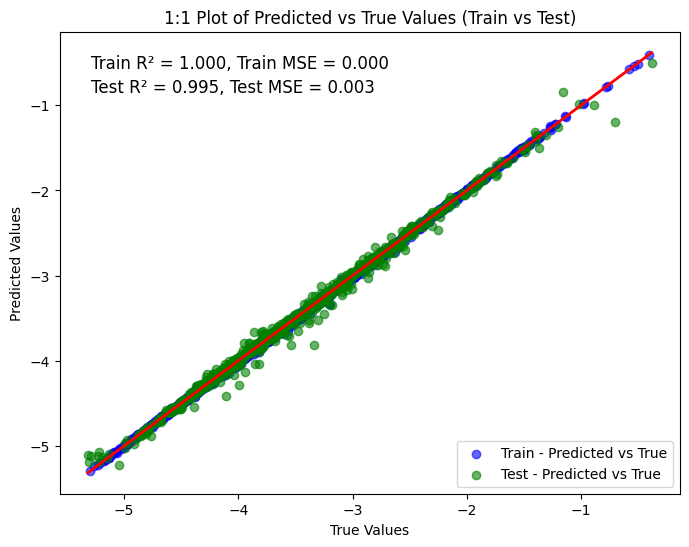

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# 데이터 로드
file_path = '../earthquake_data/4.xlsx'  # 데이터 파일 경로
data = pd.read_excel(file_path, sheet_name=None)

# 'i4' 시트에서 입력 변수 선택  
i4_data = data['i4']
X_i4 = i4_data[['Local_Magnitude', 'Moment_Magnitude', 'Hypocentral_Depth', 'Hypocentral_Distance', 'Propagation_Distance', 'dVI', 'Vs30', 'pga']]

# 'o4' 시트에서 정답값 (1열) 선택
o4_data = data['o4']
y_o4 = o4_data['1c']

# 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X_i4, y_o4, test_size=0.2, random_state=42)

# 그라디언트 부스팅 모델 학습
gb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
gb_model.fit(X_train, y_train)

# 예측 수행
y_pred_train = gb_model.predict(X_train)
y_pred_test = gb_model.predict(X_test)

# R² 점수 계산
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# MSE 계산
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# 1대1 플롯 그리기 (훈련 세트와 테스트 세트)
plt.figure(figsize=(8, 6))

# 훈련 세트
plt.scatter(y_train, y_pred_train, color='blue', label='Train - Predicted vs True', alpha=0.6)

# 테스트 세트
plt.scatter(y_test, y_pred_test, color='green', label='Test - Predicted vs True', alpha=0.6)

# 1대1 직선
plt.plot([y_o4.min(), y_o4.max()], [y_o4.min(), y_o4.max()], color='red', linewidth=2)

# 제목과 레이블
plt.title('1:1 Plot of Predicted vs True Values (Train vs Test)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

# R² 및 MSE를 한 줄로 표시
plt.text(0.05, 0.95, f'Train R² = {r2_train:.3f}, Train MSE = {mse_train:.3f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.90, f'Test R² = {r2_test:.3f}, Test MSE = {mse_test:.3f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# 범례
plt.legend()

# 그래프 출력
plt.show()


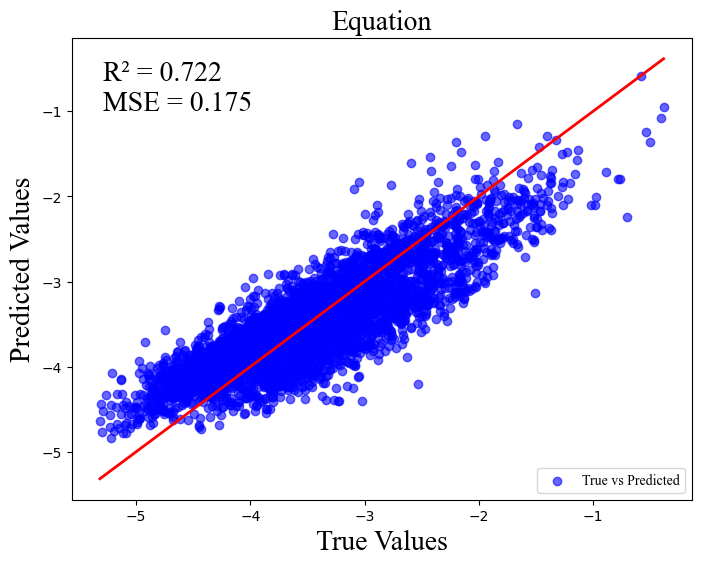

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from matplotlib import font_manager

# 데이터 로드
file_path = '../earthquake_data/4.xlsx'  # 데이터 파일 경로
data = pd.read_excel(file_path, sheet_name=None)

# 'i4' 시트에서 입력 변수 선택  
i4_data = data['i4']
X_i4 = i4_data[['Local_Magnitude', 'Moment_Magnitude', 'Hypocentral_Depth', 'Hypocentral_Distance', 'Propagation_Distance', 'dVI', 'Vs30']]

# 'o4' 시트와 'eo4' 시트에서 1열 데이터 선택
o4_data = data['o4']
eo4_data = data['eo4']

# '1C' 열 데이터 추출
y_o4 = o4_data['1c']
y_eo4 = eo4_data['1c']

# R² 점수 계산
r2 = r2_score(y_o4, y_eo4)

# MSE 계산
mse = mean_squared_error(y_o4, y_eo4)

# 글꼴 설정
font = font_manager.FontProperties(fname='C:/Windows/Fonts/times.ttf')

# 1대1 플롯 그리기
plt.figure(figsize=(8, 6))

# 1대1 플롯 (True 값 vs Predicted 값)
plt.scatter(y_o4, y_eo4, color='blue', label='True vs Predicted', alpha=0.6)

# 1대1 직선
plt.plot([y_o4.min(), y_o4.max()], [y_o4.min(), y_o4.max()], color='red', linewidth=2)

# 제목과 레이블
plt.title('Equation', fontproperties=font, fontsize=20)
plt.xlabel('True Values', fontproperties=font, fontsize=20)
plt.ylabel('Predicted Values', fontproperties=font, fontsize=20)

# R² 및 MSE 표시
plt.text(0.05, 0.95, f'R² = {r2:.3f}\nMSE = {mse:.3f}', transform=plt.gca().transAxes, fontsize=20, verticalalignment='top', fontproperties=font)

# 범례
plt.legend(fontsize=20, prop=font)

# 그래프 출력
plt.show()
